## Extracting from instance Concepts

> 144 class - Pelican <br>
> 145 class - Penguin

`Setting up model, defining functions`

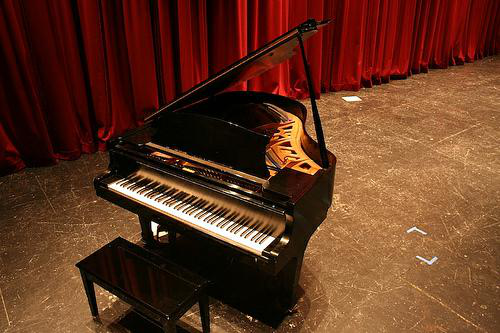

In [19]:
import torch
from torchvision.models.vgg import vgg16_bn
import torchvision.transforms as T
from PIL import Image
from zennit.canonizers import SequentialMergeBatchNorm
from zennit.composites import EpsilonPlusFlat

device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = vgg16_bn(True).to(device)
model.eval()

canonizers = [SequentialMergeBatchNorm()]
composite = EpsilonPlusFlat(canonizers)

transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(), T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

image = Image.open("/home/kaidashova/data/Piano_ImageNet/test/n03452741/002898223157907.jpg")

sample = transform(image).unsqueeze(0).to(device)
image

Prepare image for next steps/display image

In [2]:
from crp.concepts import ChannelConcept

cc = ChannelConcept()

In [3]:
from crp.helper import get_layer_names
from crp.attribution import CondAttribution
layer_names = get_layer_names(model, [torch.nn.Conv2d, torch.nn.Linear])
mask_map = {name: cc.mask for name in layer_names}
layer_map = {layer : cc for layer in layer_names}

attribution = CondAttribution(model)

In [4]:
# compute heatmap wrt. output 144 (pelican class)
conditions = [{"y": 579}]

# zennit requires gradients
sample.requires_grad = True
attr = attribution(sample, conditions, composite, mask_map=mask_map)

True


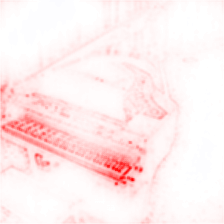

In [5]:
from crp.image import imgify

print(torch.equal(attr[0], attr.heatmap))

imgify(attr.heatmap, symmetric=True)

In [6]:
attr = attribution(sample, conditions, composite, record_layer=layer_names)
# layer features.40 has 512 channel concepts
rel_c = cc.attribute(attr.relevances['features.40'], abs_norm=True)
# the six most relevant concepts and their contribution to final classification in percent
rel_values, concept_ids = torch.topk(rel_c[0], 6)
concept_ids, rel_values*100

(tensor([448, 411, 206, 296, 183, 254], device='cuda:0'),
 tensor([15.4287,  7.4379,  3.9719,  3.6460,  2.7615,  2.5864], device='cuda:0'))

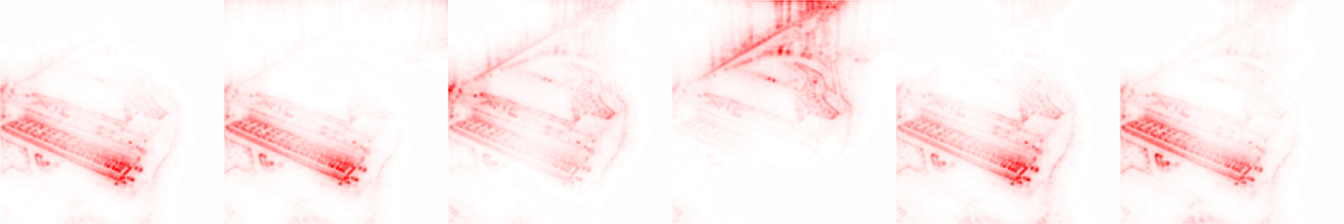

In [9]:
#look at the heatmap of concepts
conditions = [{"features.40": [id], "y": 579} for id in concept_ids]
heatmap, _, _, _ = attribution(sample, conditions, composite)

imgify(heatmap, symmetric=True, grid=(1, len(concept_ids)))

In [10]:
import torchvision
from crp.visualization import FeatureVisualization

preprocessing =  T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
data_path = "../../data/ImageNet_data"
imagenet_data = torchvision.datasets.ImageNet(data_path, transform=transform, split="val")  
fv_path = "../../data/VGG16_ImageNet"
fv = FeatureVisualization(attribution, imagenet_data, layer_map, preprocess_fn=preprocessing, path=fv_path)

'a'

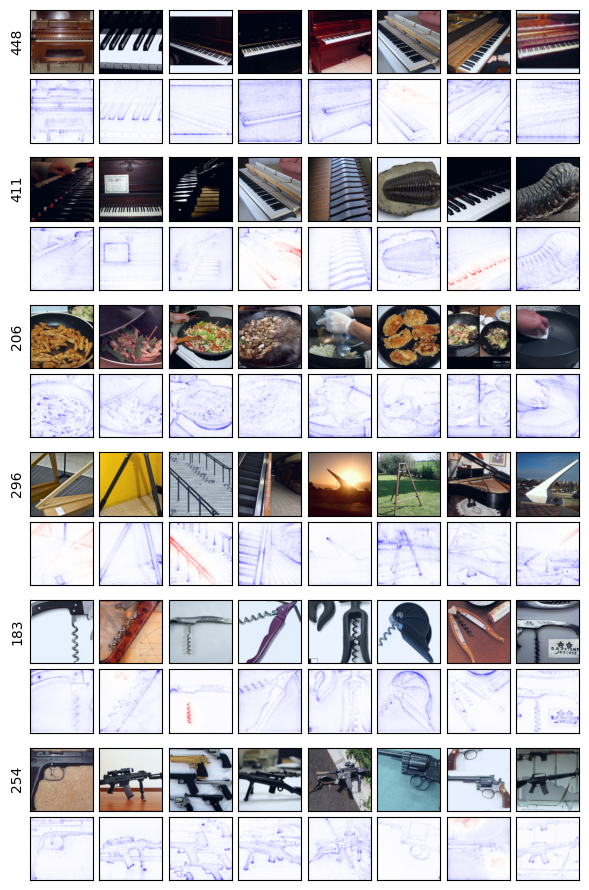

In [11]:
%matplotlib inline
from crp.image import plot_grid
from crp.image import vis_opaque_img

ref_c = fv.get_max_reference([448, 411, 206, 296, 183, 254], "features.40", "relevance",  (0, 8), composite=composite, plot_fn=None)

plot_grid(ref_c, figsize=(6, 9), padding=False)

a=input()
a

288 - Schnabel
436 - Federn
71 - Schwarz ?
296 - Ecke
386 - Kurwe
401 -? anschauen heatmaps von diesem Channel?

## Pinguine

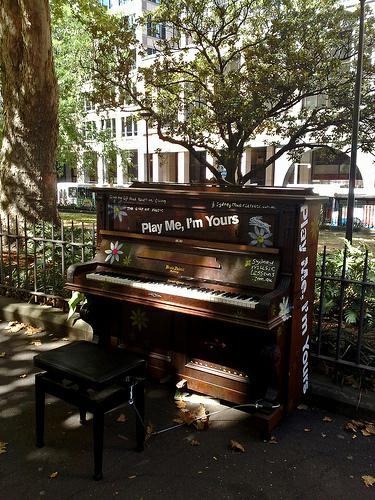

In [12]:
image2 = Image.open("/home/kaidashova/data/Piano_ImageNet/test/n04515003/0388856395606.jpg")
sample2 = transform(image2).unsqueeze(0).to(device)
image2

True


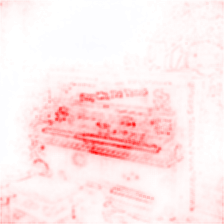

In [13]:
conditions2 = [{"y": 881}]

# zennit requires gradients
sample2.requires_grad = True
attr = attribution(sample2, conditions2, composite, mask_map=mask_map)
from crp.image import imgify

print(torch.equal(attr[0], attr.heatmap))

imgify(attr.heatmap, symmetric=True)

In [14]:
attr = attribution(sample2, conditions2, composite, record_layer=layer_names)
# layer features.40 has 512 channel concepts
rel_c = cc.attribute(attr.relevances['features.40'], abs_norm=True)
# the six most relevant concepts and their contribution to final classification in percent
rel_values, concept_ids = torch.topk(rel_c[0], 6)
concept_ids, rel_values*100

(tensor([448, 411, 197,  71, 490, 183], device='cuda:0'),
 tensor([15.6751,  4.9673,  4.4525,  4.0073,  3.0891,  1.7183], device='cuda:0'))

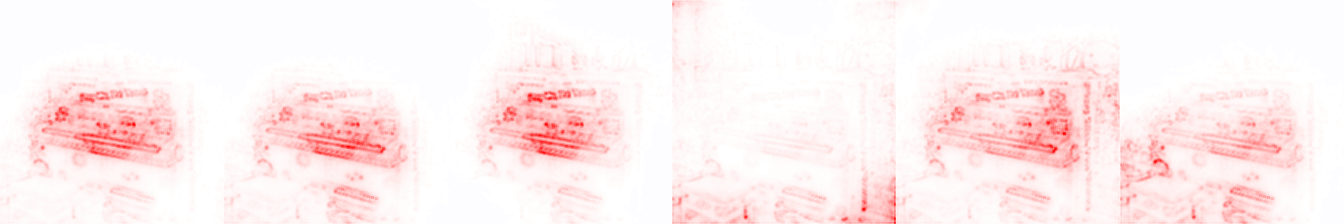

In [15]:
#look at the heatmap of concepts
conditions2 = [{"features.40": [id], "y": 881} for id in concept_ids]
heatmap, _, _, _ = attribution(sample2, conditions2, composite)

imgify(heatmap, symmetric=True, grid=(1, len(concept_ids)))

In [16]:
import torchvision
from crp.visualization import FeatureVisualization

preprocessing =  T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
data_path = "../../data/ImageNet_data"
imagenet_data = torchvision.datasets.ImageNet(data_path, transform=transform, split="val")  
fv_path = "../../data/VGG16_ImageNet"
fv = FeatureVisualization(attribution, imagenet_data, layer_map, preprocess_fn=preprocessing, path=fv_path)

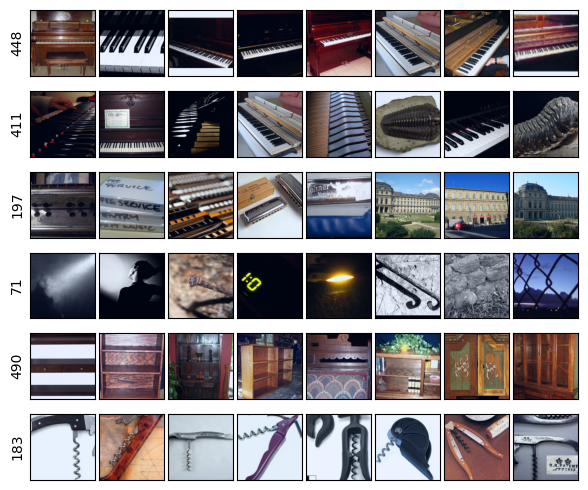

In [17]:
%matplotlib inline
from crp.image import plot_grid


ref_c = fv.get_max_reference([448, 411, 197,  71, 490, 183], "features.40", "relevance", (0, 8))

plot_grid(ref_c, figsize=(6, 5), padding=False)

349 - gelb?
506 - Stein
71 - schwarz
419 - weißen Brust -? heatmaps
72 -?
352 - ?

## 3 Example

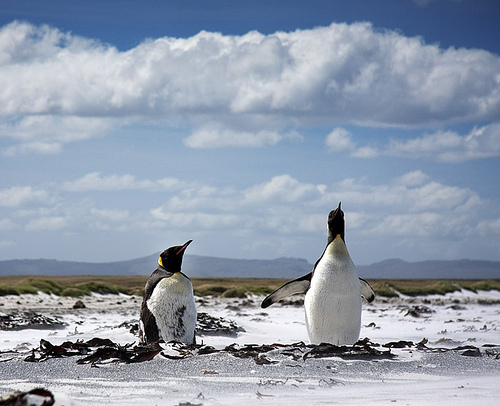

In [16]:
image3 = Image.open("images/p1.JPEG")
sample3 = transform(image3).unsqueeze(0).to(device)
image3

True


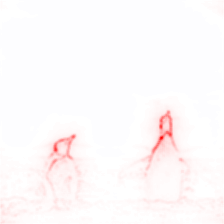

In [17]:
conditions2 = [{"y": 145}]

# zennit requires gradients
sample2.requires_grad = True
attr = attribution(sample2, conditions2, composite, mask_map=mask_map)
from crp.image import imgify

print(torch.equal(attr[0], attr.heatmap))

imgify(attr.heatmap, symmetric=True)

# Contrastive Explanations
Relevance >3

Pelican - 1) Schnabel 7.6 2) Federn 5.1 3) Schwarz 3.1 <br>
Pinguine - 1) Gelb 7 2) Stein 3.8 3)Schwarz 3.6 4) weißen Brust 3.3

> Pelican: Es ist Pelikan und kein Pinguine, weil es Schnabel und Federn hat und hat keine gelbe Farbe, keinen weißen Brust und kein Stein. <br>
> Pinguine: Es ist Pinguine und kein Pelikan, weil es gelbe Farbe, weißen Brust und Stein hat und kein Schnabel und keine Federn.

Wie soll es aussehen, dashboard, terminal ausgabe? <br>
Heatmaps von bestimmte Konzepte? <br>
input -> konzepte, output-> contrastive explanation <br>
gitlab

bilder automatisch
input (Evaluation von Model)

ALles in ein script bauen, input von User=>f[r concepte]
wenn user keine idee hat, dann einfach unbekanntes Konzept. (in erklaerung einbauen)
User Interface